# Libraries and Data

In [ ]:
#!pip install prophet

In [ ]:
#!pip freeze

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the daily bike sharing train data
df = pd.read_csv("Daily Bike Sharing training.csv")
df.head()

instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [4]:
# Change the time Series variable name
# target variable as 'y'
# date as 'ds'
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

instant        ds  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

      y  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

instant         ds  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

      y  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
# Prepare the weather situation variable

# Create dummy variables for the categorical column 'weathersit' in DataFrame 'df'
# 'drop_first=True' drops the first category
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)
# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(0)

Empty DataFrame
Columns: [instant, ds, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, y, 2, 3]
Index: []

In [7]:
# Renaming columns 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

instant         ds  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

      y  weathersit_2  weathersit_3  
0   985          True         False  
1   801          True         False  
2  1349         False         False  
3  1562         False         False  
4  1600         False         False

In [8]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head()

ds  holiday  workingday  weathersit      temp     atemp       hum  \
0 2011-01-01        0           0           2  0.344167  0.363625  0.805833   
1 2011-01-02        0           0           2  0.363478  0.353739  0.696087   
2 2011-01-03        0           1           1  0.196364  0.189405  0.437273   
3 2011-01-04        0           1           1  0.200000  0.212122  0.590435   
4 2011-01-05        0           1           1  0.226957  0.229270  0.436957   

   windspeed     y  weathersit_2  weathersit_3  
0   0.160446   985          True         False  
1   0.248539   801          True         False  
2   0.248309  1349         False         False  
3   0.160296  1562         False         False  
4   0.186900  1600         False         False

In [9]:
# Look at 2012-10-29 (Outlier)
df[df.ds == '2012-10-29']

ds  holiday  workingday  weathersit  temp   atemp   hum  \
667 2012-10-29        0           1           3  0.44  0.4394  0.88   

     windspeed   y  weathersit_2  weathersit_3  
667     0.3582  22         False          True

In [10]:
# Replace 29/30 of October 2012 with the values of 28th
# 28th because in EDA weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

# Exploratory Data Analysis

In [11]:
# Create a copy of the df with index
df_temp = df.copy()
df_temp.set_index('ds', inplace = True)

In [12]:
# Set the frequency of the DataFrame index to daily ("D")
df_temp.index.freq = "D"
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq='D')

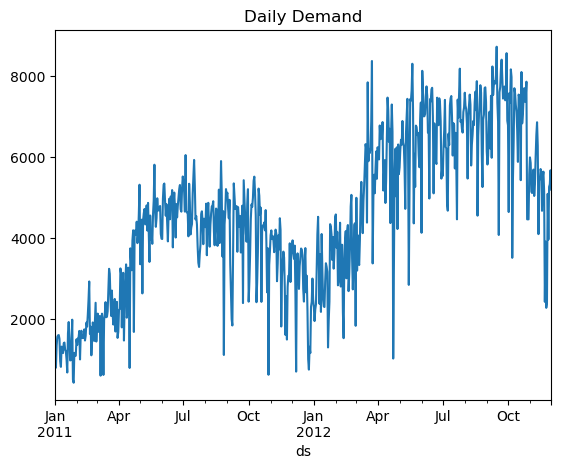

In [13]:
# Daily demand line plot
df_temp['y'].plot(title = 'Daily Demand')
plt.show()

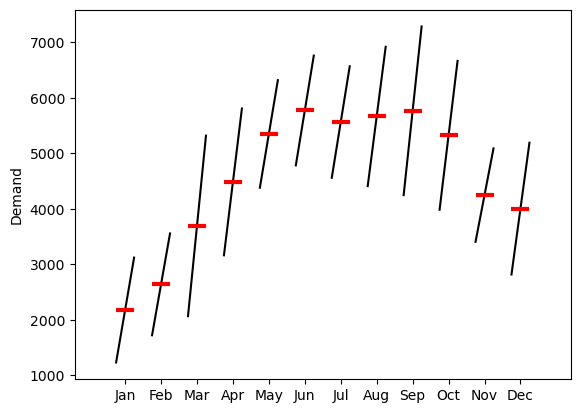

In [14]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of bike sharing demand
month_plot(df_temp['y'].resample('ME').mean(),
           ylabel = 'Demand')
plt.show()

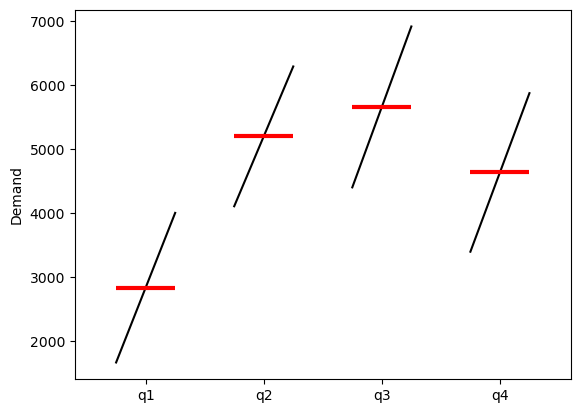

In [15]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of bike sharing demand
quarter_plot(df_temp['y'].resample('QE').mean(),
           ylabel = 'Demand')
plt.show()

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.


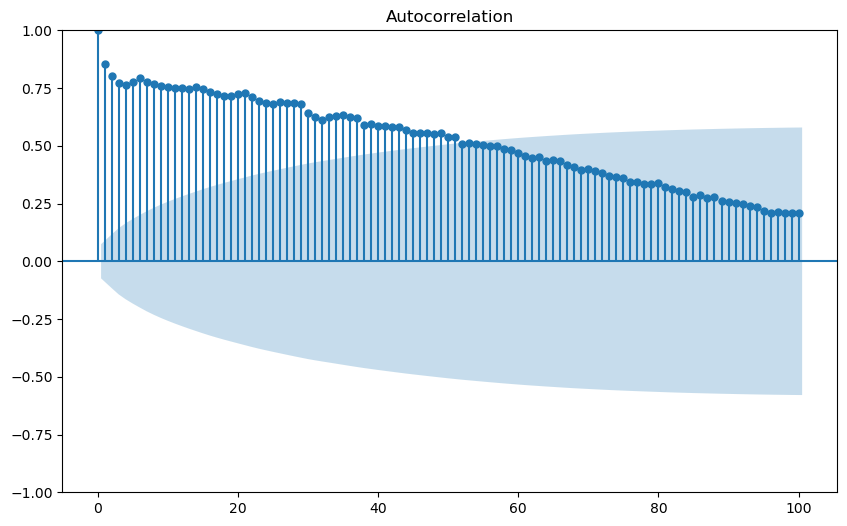

In [16]:
# Plot the autocorrelation (ACF) of bike sharing demand
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_temp['y'], lags = 100, ax = ax)
plt.show()

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Remember from our last classes:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

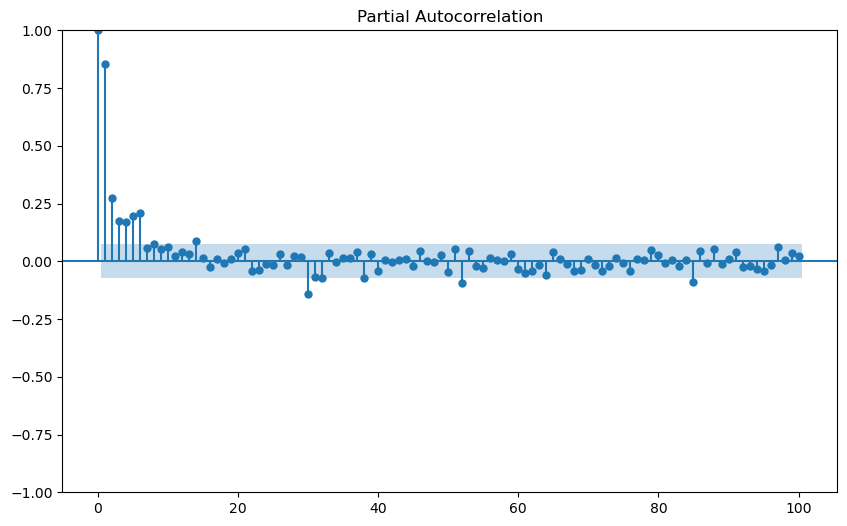

In [17]:
# Plot the partial autocorrelation (PACF) of bike sharing demand
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df_temp['y'], lags = 100, ax = ax)
plt.show()

Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Holidays

In [18]:
# Check the holidays in our df
df[df.holiday == 1].ds

16    2011-01-17
51    2011-02-21
104   2011-04-15
149   2011-05-30
184   2011-07-04
247   2011-09-05
282   2011-10-10
314   2011-11-11
327   2011-11-24
359   2011-12-26
366   2012-01-02
380   2012-01-16
415   2012-02-20
471   2012-04-16
513   2012-05-28
550   2012-07-04
611   2012-09-03
646   2012-10-08
681   2012-11-12
691   2012-11-22
Name: ds, dtype: datetime64[ns]

In [19]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [20]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

holiday         ds  lower_window  upper_window
16    gen_holi 2011-01-17            -2             2
51    gen_holi 2011-02-21            -2             2
104   gen_holi 2011-04-15            -2             2
149   gen_holi 2011-05-30            -2             2
184   gen_holi 2011-07-04            -2             2
247   gen_holi 2011-09-05            -2             2
282   gen_holi 2011-10-10            -2             2
314   gen_holi 2011-11-11            -2             2
327   gen_holi 2011-11-24            -2             2
359   gen_holi 2011-12-26            -2             2
366   gen_holi 2012-01-02            -2             2
380   gen_holi 2012-01-16            -2             2
415   gen_holi 2012-02-20            -2             2
471   gen_holi 2012-04-16            -2             2
513   gen_holi 2012-05-28            -2             2
550   gen_holi 2012-07-04            -2             2
611   gen_holi 2012-09-03            -2             2
646   gen_holi 2012-10-08            -2             2
681   gen_holi 2012-11-12            -2             2
691   gen_holi 2012-11-22            -2             2
0    christmas 2011-12-24            -5             3
1    christmas 2012-12-24            -5             3
0    new_years 2011-12-31            -3             3
1    new_years 2012-12-31            -3             3
0       easter 2011-04-24            -3             3
1       easter 2012-04-08            -3             3

# Feature Engineering

Purpose of lagged values:
- Time series often have autocorrelation, where past values influence future values. Lagged features allow the model to learn from these historical patterns.
- Lagged values give the model information about recent trends and behaviors.
- Lags at specific intervals (e.g., 7 days, 12 months) can help capture seasonal patterns.
- Many time series are autoregressive, where future values depend on past values. Lagged features directly model this dependency.




In [21]:
# Series.shift(n) - each value is moved to the n row(s) below its current position

# Create lagged values for the regressors 'temp' and 'atemp' with specified lags
for lag in [1, 3, 5, 7]:
    df[f'temp_lag_{lag}'] = df['temp'].shift(lag)  # Create lagged values for 'temp'
    df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)  # Create lagged values for 'atemp'

df.head()

ds  holiday  workingday  weathersit      temp     atemp       hum  \
0 2011-01-01        0           0           2  0.344167  0.363625  0.805833   
1 2011-01-02        0           0           2  0.363478  0.353739  0.696087   
2 2011-01-03        0           1           1  0.196364  0.189405  0.437273   
3 2011-01-04        0           1           1  0.200000  0.212122  0.590435   
4 2011-01-05        0           1           1  0.226957  0.229270  0.436957   

   windspeed     y  weathersit_2  weathersit_3  temp_lag_1  atemp_lag_1  \
0   0.160446   985          True         False         NaN          NaN   
1   0.248539   801          True         False    0.344167     0.363625   
2   0.248309  1349         False         False    0.363478     0.353739   
3   0.160296  1562         False         False    0.196364     0.189405   
4   0.186900  1600         False         False    0.200000     0.212122   

   temp_lag_3  atemp_lag_3  temp_lag_5  atemp_lag_5  temp_lag_7  atemp_lag_7  
0         NaN          NaN         NaN          NaN         NaN          NaN  
1         NaN          NaN         NaN          NaN         NaN          NaN  
2         NaN          NaN         NaN          NaN         NaN          NaN  
3    0.344167     0.363625         NaN          NaN         NaN          NaN  
4    0.363478     0.353739         NaN          NaN         NaN          NaN

In [22]:
# Correlation matrix between the lagged values and y
columns = ['y'] + [f'{var}_lag_{lag}' for var in ['temp', 'atemp'] for lag in [1,3,5,7]]
df[columns].corr()

y  temp_lag_1  temp_lag_3  temp_lag_5  temp_lag_7  \
y            1.000000    0.590368    0.581922    0.589976    0.595830   
temp_lag_1   0.590368    1.000000    0.892245    0.861173    0.864545   
temp_lag_3   0.581922    0.892245    1.000000    0.891829    0.860613   
temp_lag_5   0.589976    0.861173    0.891829    1.000000    0.891432   
temp_lag_7   0.595830    0.864545    0.860613    0.891432    1.000000   
atemp_lag_1  0.586681    0.991526    0.877489    0.848465    0.853113   
atemp_lag_3  0.577076    0.882663    0.991519    0.877082    0.847940   
atemp_lag_5  0.587374    0.847990    0.882187    0.991490    0.876584   
atemp_lag_7  0.591886    0.852673    0.847451    0.881814    0.991475   

             atemp_lag_1  atemp_lag_3  atemp_lag_5  atemp_lag_7  
y               0.586681     0.577076     0.587374     0.591886  
temp_lag_1      0.991526     0.882663     0.847990     0.852673  
temp_lag_3      0.877489     0.991519     0.882187     0.847451  
temp_lag_5      0.848465     0.877082     0.991490     0.881814  
temp_lag_7      0.853113     0.847940     0.876584     0.991475  
atemp_lag_1     1.000000     0.869430     0.836607     0.842372  
atemp_lag_3     0.869430     1.000000     0.868989     0.836076  
atemp_lag_5     0.836607     0.868989     1.000000     0.868539  
atemp_lag_7     0.842372     0.836076     0.868539     1.000000

# Prophet Model

In [23]:
# Look at df
df.head(1)

ds  holiday  workingday  weathersit      temp     atemp       hum  \
0 2011-01-01        0           0           2  0.344167  0.363625  0.805833   

   windspeed    y  weathersit_2  weathersit_3  temp_lag_1  atemp_lag_1  \
0   0.160446  985          True         False         NaN          NaN   

   temp_lag_3  atemp_lag_3  temp_lag_5  atemp_lag_5  temp_lag_7  atemp_lag_7  
0         NaN          NaN         NaN          NaN         NaN          NaN

In [24]:
# Kick out all lagged variables but the temp_lag1
df = df.iloc[:,:-7]
df.head()

ds  holiday  workingday  weathersit      temp     atemp       hum  \
0 2011-01-01        0           0           2  0.344167  0.363625  0.805833   
1 2011-01-02        0           0           2  0.363478  0.353739  0.696087   
2 2011-01-03        0           1           1  0.196364  0.189405  0.437273   
3 2011-01-04        0           1           1  0.200000  0.212122  0.590435   
4 2011-01-05        0           1           1  0.226957  0.229270  0.436957   

   windspeed     y  weathersit_2  weathersit_3  temp_lag_1  
0   0.160446   985          True         False         NaN  
1   0.248539   801          True         False    0.344167  
2   0.248309  1349         False         False    0.363478  
3   0.160296  1562         False         False    0.196364  
4   0.186900  1600         False         False    0.200000

In [25]:
# Remove any NAs
df = df.dropna()

In [26]:
from prophet import Prophet

In [27]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,     # Include yearly seasonality
    weekly_seasonality=True,     # Include weekly seasonality
    holidays=holidays,           # Include holiday effects
    seasonality_mode="multiplicative",  # Use multiplicative seasonality
    seasonality_prior_scale=10,  # Increase flexibility of seasonality. A higher value allows the model to fit more closely to the seasonal variations.
    holidays_prior_scale=10,     # Increase impact of holidays with a stronger influence, potentially improving fit on holiday-specific anomalies.
    changepoint_prior_scale=0.05 # Control flexibility in detecting trend changes. A lower value implies the model is less flexible, resulting in a smoother overall trend line.
)

# Add additional regressors (external factors) to the model
m.add_regressor("workingday")    # Whether it's a working day
m.add_regressor("temp")          # Temperature
m.add_regressor("atemp")         # Apparent temperature
m.add_regressor("hum")           # Humidity
m.add_regressor("windspeed")     # Wind speed
m.add_regressor("weathersit_2")  # Weather situation category 2
m.add_regressor("weathersit_3")  # Weather situation category 3
m.add_regressor("temp_lag_1")    # Temperature from previous time step

# Fit the model to the data
m.fit(df)

22:01:19 - cmdstanpy - INFO - Chain [1] start processing
22:01:19 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
## Regressor Coefficients
# regressor_coefficients() - used to extract and display the coefficients of the additional regressors added to the Prophet model.
# Positive coefficients indicate the regressor increases the target variable.
# Negative coefficients indicate the regressor decreases the target variable.
# The value of the coefficient represents the strength of the effect.

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

regressor  regressor_mode    center  coef_lower      coef  coef_upper
0    workingday  multiplicative  0.000000    0.382369  0.382369    0.382369
1          temp  multiplicative  0.502959    1.143414  1.143414    1.143414
2         atemp  multiplicative  0.481015    0.350011  0.350011    0.350011
3           hum  multiplicative  0.625459   -0.401237 -0.401237   -0.401237
4     windspeed  multiplicative  0.190577   -0.574266 -0.574266   -0.574266
5  weathersit_2  multiplicative  0.000000   -0.113327 -0.113327   -0.113327
6  weathersit_3  multiplicative  0.000000   -0.455665 -0.455665   -0.455665
7    temp_lag_1  multiplicative  0.503024   -0.558485 -0.558485   -0.558485

In [29]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in workingday, the target variable is expected to increase by 38.24% (multiplicatively).
For each unit increase in temp, the target variable is expected to increase by 114.34% (multiplicatively).
For each unit increase in atemp, the target variable is expected to increase by 35.00% (multiplicatively).
For each unit increase in hum, the target variable is expected to decrease by 40.12% (multiplicatively).
For each unit increase in windspeed, the target variable is expected to decrease by 57.43% (multiplicatively).
For each unit increase in weathersit_2, the target variable is expected to decrease by 11.33% (multiplicatively).
For each unit increase in weathersit_3, the target variable is expected to decrease by 45.57% (multiplicatively).
For each unit increase in temp_lag_1, the target variable is expected to decrease by 55.85% (multiplicatively).


# Cross-Validation

In [30]:
from prophet.diagnostics import cross_validation

In [31]:
# Dataset of 700 days
df.shape[0] -180 # days for training

520

In [32]:
# Apply the CV to the model
df_cv = cross_validation(model = m,
                         period = '15 days',      # Step size between cutoff dates
                         initial = '520 days',    # Size of initial training period
                         horizon = '30 days',     # Forecast horizon
                         parallel = 'processes')  # Use parallel processing for faster computation

In [33]:
# CV output
# yhat - the predicted value (forecast) for the target variable
# yhat_lower - lower bounds of the predicted forecast
# yhat_upper - upper bounds of the predicted forecast
# y - the actual observed values of the target variable
# cutoff - defines the point in time where the validation set begins

df_cv.head()

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2012-06-20  8212.178699  7511.309961  8930.117902  6211 2012-06-19
1 2012-06-21  8508.695940  7806.235741  9151.239683  5905 2012-06-19
2 2012-06-22  8148.683102  7484.655244  8908.395285  5823 2012-06-19
3 2012-06-23  7727.278545  6981.626026  8394.005147  7458 2012-06-19
4 2012-06-24  7881.103348  7198.078569  8588.385313  6891 2012-06-19

# Performance Metrics

In [34]:
# horizon - the number of time steps (periods) into the future for which predictions are made
# mse - mean squared error
# rmse - root mean squared error
# mae - mean absolute error
# mape - mean absolute percentage error
# mdape - median absolute percentage error
# smape - symmetric mean absolute percentage error
# coverage - the proportion of observed values (y) that fall within the forecast uncertainty intervals ('yhat_lower' to 'yhat_upper').

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

horizon           mse         rmse          mae      mape     mdape  \
0   3 days  1.580466e+06  1257.165710   998.933016  0.174377  0.125145   
1   4 days  1.418184e+06  1190.875151   934.198333  0.156159  0.114525   
2   5 days  1.455798e+06  1206.564581   963.756447  0.156501  0.110989   
3   6 days  1.141501e+06  1068.410353   853.458442  0.132546  0.094553   
4   7 days  1.232940e+06  1110.378517   870.997944  0.131218  0.094553   
5   8 days  1.010263e+06  1005.118454   772.064639  0.108608  0.089680   
6   9 days  9.635179e+05   981.589475   770.275112  0.108414  0.098007   
7  10 days  1.403263e+06  1184.594204   893.389418  0.129578  0.102210   
8  11 days  1.491633e+06  1221.324147   914.204894  0.136532  0.096696   
9  12 days  1.930823e+06  1389.540586  1079.933778  0.169527  0.118208   
10 13 days  1.528101e+06  1236.163919   945.177644  0.144808  0.103220   
11 14 days  1.578631e+06  1256.435695   968.136025  0.145722  0.114100   
12 15 days  1.176889e+06  1084.844973   811.245654  0.115469  0.098000   
13 16 days  1.262743e+06  1123.718442   902.606723  0.140712  0.110412   
14 17 days  1.326361e+06  1151.677339   939.156742  0.155917  0.126342   
15 18 days  2.148762e+06  1465.865556  1158.192577  0.194648  0.132620   
16 19 days  2.491163e+06  1578.341881  1231.387419  0.201855  0.121608   
17 20 days  2.687194e+06  1639.266291  1276.298328  0.203275  0.122817   
18 21 days  2.495936e+06  1579.853096  1212.803158  0.212529  0.124318   
19 22 days  2.166746e+06  1471.987025  1152.010977  0.205242  0.136167   
20 23 days  2.074934e+06  1440.463062  1147.178059  0.224512  0.145184   
21 24 days  1.617422e+06  1271.779028  1072.739292  0.210967  0.139386   
22 25 days  1.597090e+06  1263.760168  1078.752549  0.204033  0.133623   
23 26 days  1.387472e+06  1177.909888   974.787732  0.163451  0.124464   
24 27 days  1.535071e+06  1238.979991  1011.553020  0.150459  0.124464   
25 28 days  1.550621e+06  1245.239341   930.398641  0.136270  0.094845   
26 29 days  1.788071e+06  1337.187708   996.018787  0.146977  0.087410   
27 30 days  1.585141e+06  1259.023774   886.119437  0.126068  0.081627   

       smape  coverage  
0   0.166035  0.533333  
1   0.151645  0.533333  
2   0.152665  0.500000  
3   0.134598  0.566667  
4   0.136546  0.566667  
5   0.116873  0.566667  
6   0.115184  0.533333  
7   0.132414  0.500000  
8   0.137175  0.566667  
9   0.173072  0.466667  
10  0.152231  0.566667  
11  0.155151  0.500000  
12  0.123685  0.566667  
13  0.146896  0.466667  
14  0.163952  0.466667  
15  0.198332  0.466667  
16  0.203825  0.500000  
17  0.203671  0.466667  
18  0.202513  0.466667  
19  0.196778  0.433333  
20  0.203691  0.433333  
21  0.191449  0.433333  
22  0.188699  0.400000  
23  0.161982  0.466667  
24  0.169029  0.466667  
25  0.155155  0.600000  
26  0.167760  0.600000  
27  0.141569  0.633333

In [35]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 1266.0
The MAPE is 16.02 %


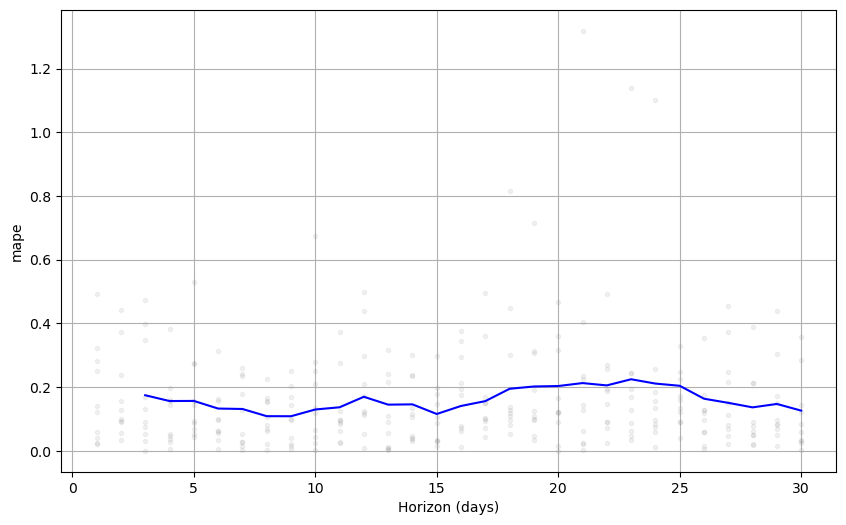

In [36]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'mape');

# Exploring the Error

In [37]:
# Compute the Error / deviation
# absolute difference between predicted ('yhat') and actual ('y') values
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
# the percentage deviation of predicted from actual values
df_cv['deviation_%'] = (df_cv['yhat'] / df_cv['y'] - 1) *100

In [38]:
# Days with the highest percentage deviation
df_cv.sort_values(by = 'deviation_%', ascending = False).head(10)

ds         yhat   yhat_lower   yhat_upper     y     cutoff  \
290 2012-11-22  5623.430333  4761.965905  6366.965520  2425 2012-11-01   
292 2012-11-24  4869.611336  4077.786093  5726.484061  2277 2012-11-01   
293 2012-11-25  5097.230383  4336.005850  5904.076397  2424 2012-11-01   
17  2012-07-07  8781.096853  8069.148061  9493.887411  4840 2012-06-19   
18  2012-07-08  8009.291015  7300.710923  8707.229328  4672 2012-06-19   
9   2012-06-29  9139.543590  8433.391586  9768.067871  5463 2012-06-19   
214 2012-10-07  5373.433303  4564.376928  6117.446186  3510 2012-10-02   
11  2012-07-01  8295.646684  7616.285946  9012.105277  5531 2012-06-19   
180 2012-09-18  6082.861972  5273.398198  6879.353379  4073 2012-09-17   
291 2012-11-23  5832.963305  5011.189664  6652.055428  3910 2012-11-01   

       deviation  deviation_%  
290  3198.430333   131.894034  
292  2592.611336   113.860840  
293  2673.230383   110.281781  
17   3941.096853    81.427621  
18   3337.291015    71.431743  
9    3676.543590    67.298986  
214  1863.433303    53.089268  
11   2764.646684    49.984572  
180  2009.861972    49.345985  
291  1922.963305    49.180647

In [39]:
# Days with the lowest deviation
df_cv.sort_values(by = 'deviation', ascending = True).head(10)

ds         yhat   yhat_lower   yhat_upper     y     cutoff  \
47 2012-07-22  4082.677275  3386.259927  4792.294882  7410 2012-07-04   
50 2012-07-25  4859.357761  4134.120222  5607.147303  8173 2012-07-04   
88 2012-08-17  4017.223457  3271.007045  4761.725518  7148 2012-07-19   
57 2012-08-01  4637.063417  3899.136293  5402.212754  7580 2012-07-04   
49 2012-07-24  4853.754835  4102.780044  5614.782794  7592 2012-07-04   
56 2012-07-31  4521.283243  3774.764943  5243.494292  7216 2012-07-04   
62 2012-07-22  4824.376015  4094.554793  5642.538959  7410 2012-07-19   
65 2012-07-25  5610.303419  4812.941747  6393.642985  8173 2012-07-19   
59 2012-08-03  4618.938344  3904.402601  5413.658268  7175 2012-07-04   
55 2012-07-30  4583.203286  3845.502002  5311.711240  7105 2012-07-04   

      deviation  deviation_%  
47 -3327.322725   -44.903141  
50 -3313.642239   -40.543769  
88 -3130.776543   -43.799336  
57 -2942.936583   -38.825021  
49 -2738.245165   -36.067507  
56 -2694.716757   -37.343636  
62 -2585.623985   -34.893711  
65 -2562.696581   -31.355642  
59 -2556.061656   -35.624553  
55 -2521.796714   -35.493268

# Parameter Tuning

In [40]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode' : ['additive', 'multiplicative']
}

In [41]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prio

In [42]:
# Placeholder for storing the results
tuning_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:

  # build the model
  m = Prophet(
      yearly_seasonality=True,
      weekly_seasonality= True,
      holidays = holidays,
      **params)
  m.add_regressor("workingday")
  m.add_regressor("temp")
  m.add_regressor("atemp")
  m.add_regressor("hum")
  m.add_regressor("windspeed")
  m.add_regressor("weathersit_2")
  m.add_regressor("weathersit_3")
  m.add_regressor("temp_lag_1")
  m.fit(df)

  # Cross-Validation
  df_cv = cross_validation(model = m,
                          period = '15 days',
                          initial = '521 days',
                          horizon = '30 days',
                          parallel ='processes')


  # Compute and Store the Error
  rmse = performance_metrics(df_cv)['rmse'].mean()
  tuning_results.append(rmse)

22:01:41 - cmdstanpy - INFO - Chain [1] start processing
22:01:42 - cmdstanpy - INFO - Chain [1] done processing
22:01:45 - cmdstanpy - INFO - Chain [1] start processing
22:01:45 - cmdstanpy - INFO - Chain [1] done processing
22:01:49 - cmdstanpy - INFO - Chain [1] start processing
22:01:50 - cmdstanpy - INFO - Chain [1] done processing
22:01:53 - cmdstanpy - INFO - Chain [1] start processing
22:01:54 - cmdstanpy - INFO - Chain [1] done processing
22:01:59 - cmdstanpy - INFO - Chain [1] start processing
22:01:59 - cmdstanpy - INFO - Chain [1] done processing
22:02:04 - cmdstanpy - INFO - Chain [1] start processing
22:02:04 - cmdstanpy - INFO - Chain [1] done processing
22:02:09 - cmdstanpy - INFO - Chain [1] start processing
22:02:09 - cmdstanpy - INFO - Chain [1] done processing
22:02:14 - cmdstanpy - INFO - Chain [1] start processing
22:02:15 - cmdstanpy - INFO - Chain [1] done processing
22:02:19 - cmdstanpy - INFO - Chain [1] start processing
22:02:20 - cmdstanpy - INFO - Chain [1]

In [43]:
# Parameter Tuning outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

changepoint_prior_scale  holidays_prior_scale seasonality_mode  \
0                      0.05                    10         additive   
1                      0.05                    10         additive   
2                      0.05                    10   multiplicative   
3                      0.05                    10   multiplicative   
4                      0.05                    20         additive   
5                      0.05                    20         additive   
6                      0.05                    20   multiplicative   
7                      0.05                    20   multiplicative   
8                      0.50                    10         additive   
9                      0.50                    10         additive   
10                     0.50                    10   multiplicative   
11                     0.50                    10   multiplicative   
12                     0.50                    20         additive   
13                     0.50                    20         additive   
14                     0.50                    20   multiplicative   
15                     0.50                    20   multiplicative   

    seasonality_prior_scale  tuning_results  
0                        10      982.251786  
1                        20      982.431900  
2                        10     1265.644941  
3                        20     1255.508187  
4                        10      983.771964  
5                        20      984.717779  
6                        10     1262.451164  
7                        20     1262.482495  
8                        10     1143.444054  
9                        20     1154.492199  
10                       10     2254.763490  
11                       20     2268.982201  
12                       10     1139.227015  
13                       20     1153.352769  
14                       10     2272.275209  
15                       20     2284.015845

In [44]:
# Fetch the best params
best_params = all_params[tuning_results.index(min(tuning_results))]

# Predict the future

In [45]:
# Load the daily bike sharing training data
df_train = pd.read_csv("Daily Bike Sharing training.csv")
# Load the daily bike sharing future data
df_future = pd.read_csv("Daily Bike Sharing future.csv")

# concat both together
df = pd.concat([df_train, df_future])
df.reset_index(drop = True, inplace = True)
df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  12/27/2012       1   1    12        0        4           1   
727      728  12/28/2012       1   1    12        0        5           1   
728      729  12/29/2012       1   1    12        0        6           0   
729      730  12/30/2012       1   1    12        0        0           0   
730      731  12/31/2012       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     NaN         NaN   
727           2  0.253333  0.255046  0.590000   0.155471     NaN         NaN   
728           2  0.253333  0.242400  0.752917   0.124383     NaN         NaN   
729           1  0.255833  0.231700  0.483333   0.350754     NaN         NaN   
730           2  0.215833  0.223487  0.577500   0.154846     NaN         NaN   

     cnt  
726  NaN  
727  NaN  
728  NaN  
729  NaN  
730  NaN

In [46]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      701 non-null    float64
 14  registered  701 non-null    float64
 15  cnt         701 non-null    float64
dtypes: float64(7), int64(8), object(1)
memory usage: 91.5+ KB


In [47]:
# Change the time Series variable name
# target variable as 'y'
# date as 'ds'
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

instant        ds  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446   331.0       654.0   
1           2  0.363478  0.353739  0.696087   0.248539   131.0       670.0   
2           1  0.196364  0.189405  0.437273   0.248309   120.0      1229.0   
3           1  0.200000  0.212122  0.590435   0.160296   108.0      1454.0   
4           1  0.226957  0.229270  0.436957   0.186900    82.0      1518.0   

        y  
0   985.0  
1   801.0  
2  1349.0  
3  1562.0  
4  1600.0

In [48]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

instant         ds  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446   331.0       654.0   
1           2  0.363478  0.353739  0.696087   0.248539   131.0       670.0   
2           1  0.196364  0.189405  0.437273   0.248309   120.0      1229.0   
3           1  0.200000  0.212122  0.590435   0.160296   108.0      1454.0   
4           1  0.226957  0.229270  0.436957   0.186900    82.0      1518.0   

        y  
0   985.0  
1   801.0  
2  1349.0  
3  1562.0  
4  1600.0

In [49]:
# Prepare the weather situation variable

# Create dummy variables for the categorical column 'weathersit' in DataFrame 'df'
# 'drop_first=True' drops the first category
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)

# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(0)

Empty DataFrame
Columns: [instant, ds, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, y, 2, 3]
Index: []

In [50]:
# Renaming variables 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

instant         ds  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446   331.0       654.0   
1           2  0.363478  0.353739  0.696087   0.248539   131.0       670.0   
2           1  0.196364  0.189405  0.437273   0.248309   120.0      1229.0   
3           1  0.200000  0.212122  0.590435   0.160296   108.0      1454.0   
4           1  0.226957  0.229270  0.436957   0.186900    82.0      1518.0   

        y  weathersit_2  weathersit_3  
0   985.0          True         False  
1   801.0          True         False  
2  1349.0         False         False  
3  1562.0         False         False  
4  1600.0         False         False

In [51]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head()

ds  holiday  workingday  weathersit      temp     atemp       hum  \
0 2011-01-01        0           0           2  0.344167  0.363625  0.805833   
1 2011-01-02        0           0           2  0.363478  0.353739  0.696087   
2 2011-01-03        0           1           1  0.196364  0.189405  0.437273   
3 2011-01-04        0           1           1  0.200000  0.212122  0.590435   
4 2011-01-05        0           1           1  0.226957  0.229270  0.436957   

   windspeed       y  weathersit_2  weathersit_3  
0   0.160446   985.0          True         False  
1   0.248539   801.0          True         False  
2   0.248309  1349.0         False         False  
3   0.160296  1562.0         False         False  
4   0.186900  1600.0         False         False

In [52]:
# Replace 29/30 of October 2012 with the values of 28th
# 28th because in EDA weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

In [53]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's Eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [54]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

holiday         ds  lower_window  upper_window
16    gen_holi 2011-01-17            -2             2
51    gen_holi 2011-02-21            -2             2
104   gen_holi 2011-04-15            -2             2
149   gen_holi 2011-05-30            -2             2
184   gen_holi 2011-07-04            -2             2
247   gen_holi 2011-09-05            -2             2
282   gen_holi 2011-10-10            -2             2
314   gen_holi 2011-11-11            -2             2
327   gen_holi 2011-11-24            -2             2
359   gen_holi 2011-12-26            -2             2
366   gen_holi 2012-01-02            -2             2
380   gen_holi 2012-01-16            -2             2
415   gen_holi 2012-02-20            -2             2
471   gen_holi 2012-04-16            -2             2
513   gen_holi 2012-05-28            -2             2
550   gen_holi 2012-07-04            -2             2
611   gen_holi 2012-09-03            -2             2
646   gen_holi 2012-10-08            -2             2
681   gen_holi 2012-11-12            -2             2
691   gen_holi 2012-11-22            -2             2
724   gen_holi 2012-12-25            -2             2
0    christmas 2011-12-24            -5             3
1    christmas 2012-12-24            -5             3
0    new_years 2011-12-31            -3             3
1    new_years 2012-12-31            -3             3
0       easter 2011-04-24            -3             3
1       easter 2012-04-08            -3             3

In [55]:
# Creating lagged values for the regressors
lag = 1
df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
df.head(1)

ds  holiday  workingday  weathersit      temp     atemp       hum  \
0 2011-01-01        0           0           2  0.344167  0.363625  0.805833   

   windspeed      y  weathersit_2  weathersit_3  temp_lag_1  
0   0.160446  985.0          True         False         NaN

# Prophet Model

In [56]:
# Just the train data (excluding last 30 points)
train = df.iloc[:-30]

In [57]:
# Remove any NAs
train = train.dropna()

In [58]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality= True,
    holidays = holidays,
    **best_params)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("temp_lag_1")
m.fit(train)

22:04:22 - cmdstanpy - INFO - Chain [1] start processing
22:04:22 - cmdstanpy - INFO - Chain [1] done processing


# Forecasting

In [59]:
# Drop columns 'ds' and 'y' from DataFrame df to create future_regressors
future_regressors = df.drop(columns = ['ds', 'y'])
# Drop rows with missing values (NaNs) from future_regressors
future_regressors = future_regressors.dropna()
# Reset the index
future_regressors.reset_index(drop = True, inplace = True)

In [60]:
# Create a future dataframe using Prophet's make_future_dataframe method
future = m.make_future_dataframe(periods = 30)
# Concatenate future dataframe with future_regressors along axis 1 (columns)
future = pd.concat([future, future_regressors], axis = 1)

In [61]:
# Using the Prophet model to generate predictions for future timestamps
forecast = m.predict(future)
forecast.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
725 2012-12-27  6535.658977  2185.943437  3829.679569  6534.982550   
726 2012-12-28  6541.756896  3707.541030  5398.624504  6541.028829   
727 2012-12-29  6547.854815  3364.883039  5022.547388  6547.072667   
728 2012-12-30  6553.952734  3414.712585  5201.340872  6553.121500   
729 2012-12-31  6560.050652  2460.202197  4106.658646  6559.180171   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
725  6536.317120    -3504.888106          -3504.888106          -3504.888106   
726  6542.469013    -1992.561119          -1992.561119          -1992.561119   
727  6548.628694    -2355.752926          -2355.752926          -2355.752926   
728  6554.775239    -2288.415133          -2288.415133          -2288.415133   
729  6560.906735    -3251.538735          -3251.538735          -3251.538735   

          atemp  ...  workingday  workingday_lower  workingday_upper  \
725 -317.025045  ...  647.582653        647.582653        647.582653   
726 -281.625116  ...  647.582653        647.582653        647.582653   
727 -297.385837  ...    0.000000          0.000000          0.000000   
728 -310.721256  ...    0.000000          0.000000          0.000000   
729 -320.957124  ...  647.582653        647.582653        647.582653   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
725 -549.532198   -549.532198   -549.532198                   0.0   
726 -559.924441   -559.924441   -559.924441                   0.0   
727 -569.866592   -569.866592   -569.866592                   0.0   
728 -579.050425   -579.050425   -579.050425                   0.0   
729 -587.204133   -587.204133   -587.204133                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
725                         0.0                         0.0  3030.770871  
726                         0.0                         0.0  4549.195777  
727                         0.0                         0.0  4192.101889  
728                         0.0                         0.0  4265.537600  
729                         0.0                         0.0  3308.511917  

[5 rows x 61 columns]

# Data Viz

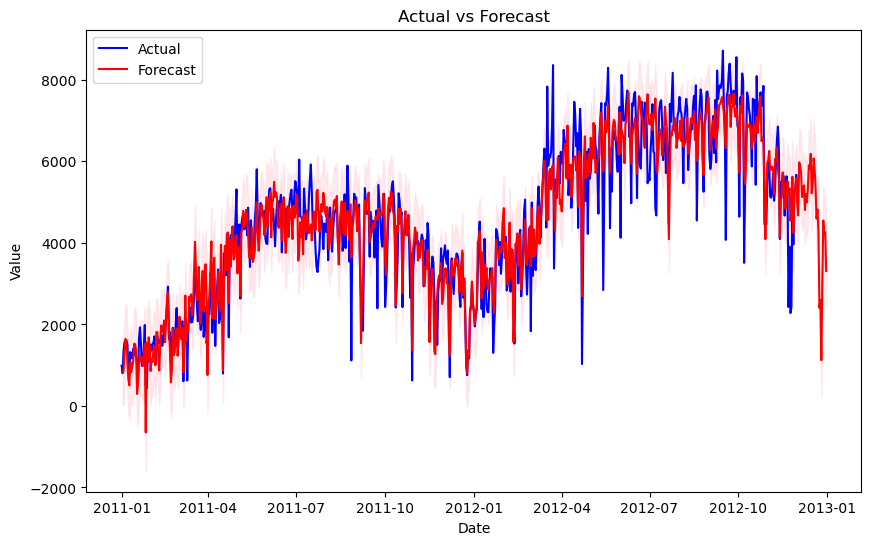

In [62]:
# Visualize time series plot
plt.figure(figsize=(10, 6))
# Plot actual and forecasted values
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
# Fill the uncertainty interval (between yhat_lower and yhat_upper) with a pink color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
# add title, xlabel, ylabel, legend
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

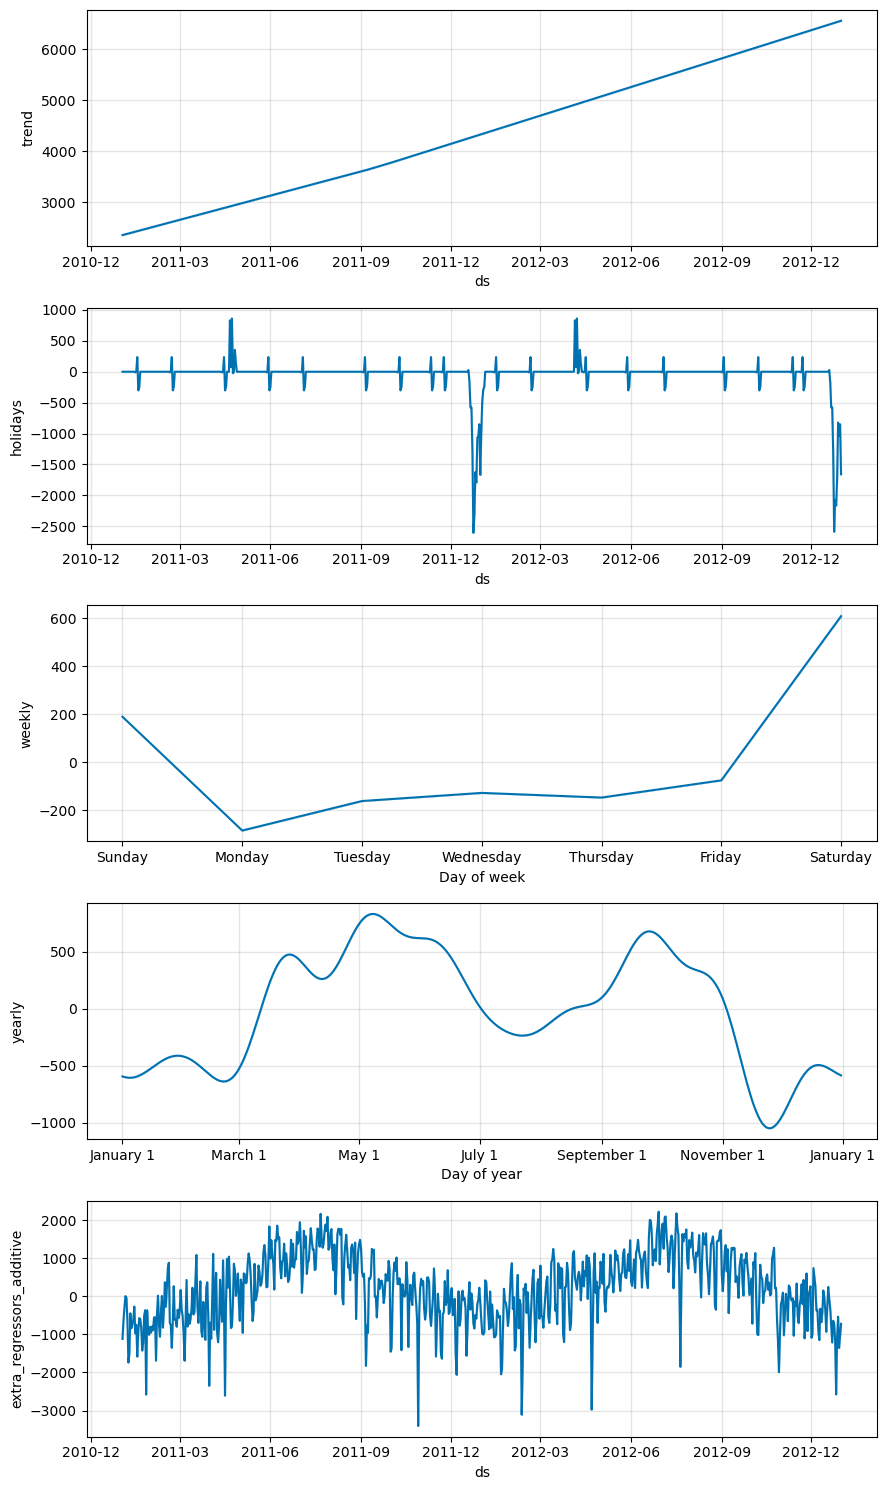

In [63]:
# Visualize components plot
# 1. Trend: Shows the overall trend of the time series over time.
# 2. Holidays : Shows the effect of holidays on the forecast.
# 3. Weekly Seasonality: Shows patterns that repeat weekly.
# 4. Yearly Seasonality: Displays patterns that repeat annually.
# 4. Other Regressors: Displays the impact of additional regressors added to the model.
m.plot_components(forecast)
plt.show()

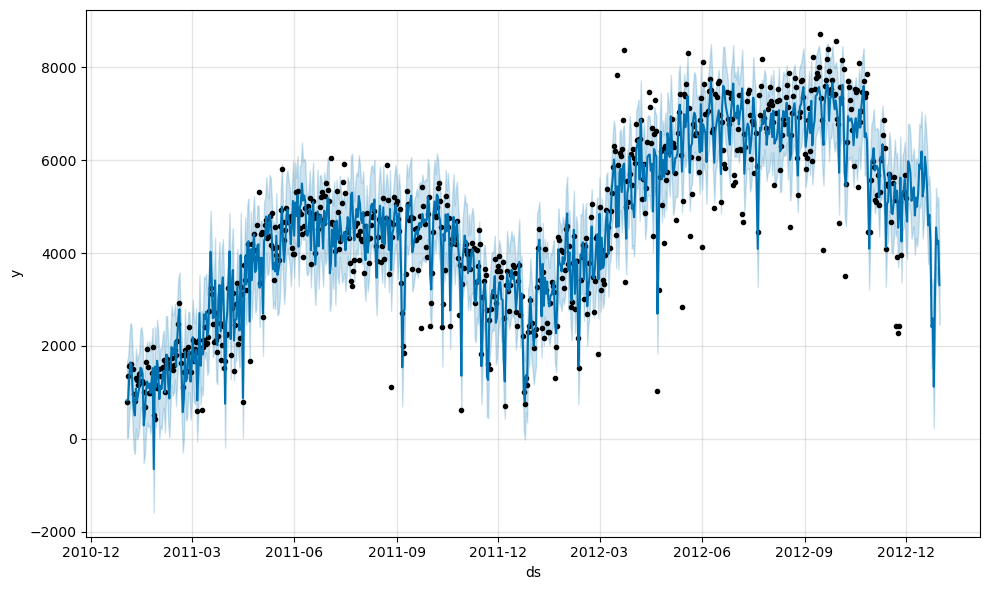

In [64]:
# Visualize forecast plot with uncertainty bounds
m.plot(forecast)
plt.show()

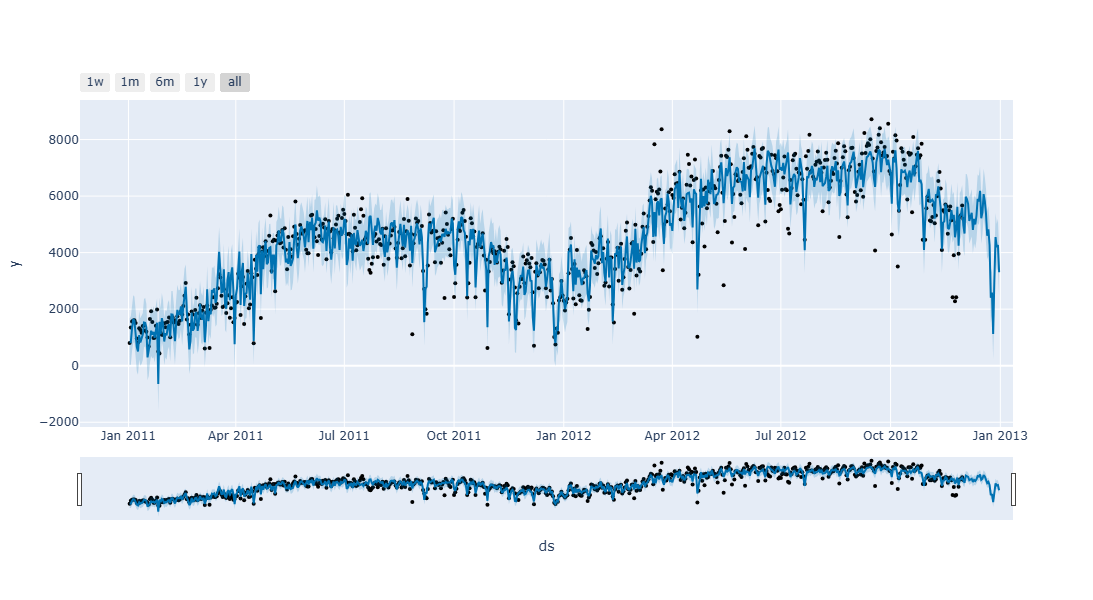

In [65]:
# Interactive visualization (using Plotly)
from prophet.plot import plot_plotly
import plotly.offline as py

# Use Prophet's plot_plotly function to generate an interactive plotly figure
fig = plot_plotly(m, forecast)
# Use Plotly's offline mode to display the interactive plotly figure
py.iplot(fig)